## Libraries Overview

### **NumPy**
Used for fast numerical operations and handling arrays.

### **Pandas**
Provides DataFrame structures for easy data loading, cleaning, and analysis.

### **Matplotlib**
A basic plotting library for creating different types of charts.

### **GridSpec (Matplotlib)**
Helps organize multiple subplots in a flexible layout.

### **Seaborn**
Built on Matplotlib; used for statistical and visually appealing plots.


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import pandas as pd



### Loading the Dataset

The dataset is loaded using **Pandas** with the `read_csv()` function:
This command reads the cleaned jobs data from the specified path and stores it in a DataFrame for analysis.

In [28]:
df = pd.read_csv(r"D:\Projects\Year2-Term1\Project Data Science Methodology\Data cleaning\cleaned_jobs.csv")

### Previewing the Dataset

To display the first 5 rows of the dataset, we use the `head()` function:
This helps you quickly understand the structure of the data and check if it loaded correctly.

In [29]:
df.head()

,Title,company,location,job_type,Experience_level,Experience_year,categories,department,Number_of_skills
0,Data Scientist with Database Expertise,Confidential,Riyadh,Full Time,Experienced,5.0,IT/Software Development,Data Science,10
1,Data Analyst,Royal Herbs,Haram,Full Time,Experienced,3.0,Analyst/Research,Analyst/Research,9
2,Data Entry Specialist,El-Dahan Company,Cairo,Full Time,Entry Level,1.0,Administration,Administration,3
3,Junior Data Analyst,Yodawy,Mohandessin,Full Time,Entry Level,1.0,Logistics/Supply Chain,Operations/Management,8
4,Data Analytics Specialist,MEAHCO - Saudi German Health,Katameya,Full Time,Experienced,3.0,Medical/Healthcare,Quality,8


### Checking Dataset Information
To view a summary of the dataset — including columns, data types, and non-null counts — use:
This helps you understand the structure, detect missing values, and know each column’s data type.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8234 entries, 0 to 8233
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             8234 non-null   object
 1   company           8234 non-null   object
 2   location          8234 non-null   object
 3   job_type          8234 non-null   object
 4   Experience_level  8234 non-null   object
 5   Experience_year   8234 non-null   object
 6   categories        8234 non-null   object
 7   department        8234 non-null   object
 8   Number_of_skills  8234 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 579.1+ KB


### Descriptive Statistics for *Number_of_skills*

To get basic statistical insights (count, mean, min, max, etc.) for the  
`Number_of_skills` column, use:
This helps you understand the distribution and range of skills required in the jobs dataset.

In [31]:
df['Number_of_skills'].describe()

count    8234.000000
mean        6.636021
std         1.765706
min         1.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        24.000000
Name: Number_of_skills, dtype: float64

###  Exploring Unique Values in Each Column

The code below prints the unique values for every column in the dataset and shows how many unique entries each column contains:
This helps you:

Understand the diversity of values in each column

Detect categorical features

Spot potential issues like duplicates or inconsistent formatting


In [32]:
for col in df.columns:
    print(f"Column {col}:")
    print(df[col].unique())
    print(f"Number of unique values: {len(df[col].value_counts())}")
    print("------------------------------")

Column Title:
['Data Scientist with Database Expertise' 'Data Analyst'
 'Data Entry Specialist' ... 'Agent-Purchasing'
 'Director of Rooms - Ritz Carlton Amaala, Saudi Arabia' 'AsstDir-Sales I']
Number of unique values: 5897
------------------------------
Column company:
['Confidential' 'Royal Herbs' 'El-Dahan Company' ... 'Groupe Clarins'
 'Paradox EN' 'Bechtel Corporation']
Number of unique values: 2799
------------------------------
Column location:
['Riyadh' 'Haram' 'Cairo' 'Mohandessin' 'Katameya' 'Dokki' 'Heliopolis'
 'Abu Rawash' 'Nasr City' 'New Cairo' 'Giza' 'Sheraton' 'Sheikh Zayed'
 'Maadi' '6th of October' 'Sidi Gaber' 'Alexandria' 'Abu Dhabi'
 '10th of Ramadan City' 'Obour City' 'New Nozha' 'Mallawi' 'Badr City'
 'New Capital' 'Hadayek Alahram' '15th May City' 'Menia' 'Madinaty'
 'Bourj Alarab' 'Smouha' 'Ameria' 'Vancouver' 'Alsadat City' 'Al Ahmadi'
 'Dkhaila' 'Agouza' 'Mokattam' 'Luxor' 'Manakh' 'Ataqah' 'Mahalla Kubra'
 'Batang' 'London' 'Shorouk City' 'Dabaa' 'Helwan' 

###  Skills Count by Experience Level

The following code groups the dataset by **Experience_level** and **Number_of_skills**,  
then creates a table showing how many jobs fall into each combination:
This helps you understand how required skills vary across different experience levels.

In [33]:
Experience_skills= df.groupby(['Experience_level', 'Number_of_skills']).size().unstack(fill_value=0)
Experience_skills

Number_of_skills,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,24
Experience_level,,,,,,,,,,,,,,,,
Entry Level,27,48,61,116,120,147,1151,519,75,5,1,2,0,0,0,0
Experienced,96,148,175,245,267,296,1817,1290,192,12,7,0,2,1,1,1
Manager,16,31,49,64,82,97,262,409,59,3,3,0,0,0,0,0
Not specified,1,1,0,2,3,2,102,0,0,0,0,0,0,0,0,0
Senior Management,4,5,11,9,20,20,77,51,6,0,0,0,0,0,0,0
Student,0,2,0,3,1,1,15,1,0,0,0,0,0,0,0,0


### Skills Count by Experience Years

The following code groups job entries by **Experience_year** and **Number_of_skills**,  
then creates a pivot-style table showing how many jobs match each combination:
This helps analyze how the number of required skills changes with years of experience.

In [34]:
Experience_year_skills = df.groupby(['Experience_year', 'Number_of_skills']).size().unstack(fill_value=0)
Experience_year_skills

Number_of_skills,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,24
Experience_year,,,,,,,,,,,,,,,,
0.0,8,9,18,31,29,41,32,199,31,1,0,0,0,0,0,0
1.0,19,40,42,70,83,86,84,352,51,3,1,1,0,0,0,0
10.0,4,6,6,12,23,15,17,55,10,2,1,0,0,0,0,0
11.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
12.0,0,0,1,1,2,2,2,8,2,0,0,0,0,0,0,0
13.0,1,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0
14.0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0
15.0,1,1,4,3,3,5,4,16,3,0,0,0,0,0,0,0
18.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


### Job Types by Experience Years

The following code groups jobs by **Experience_year** and **job_type**,  
creating a table that shows how many jobs of each type exist for each experience year:
This provides insights into how job types are distributed across different experience levels.

In [35]:
Experience_year_job_type = df.groupby(['Experience_year', 'job_type']).size().unstack(fill_value=0)
Experience_year_job_type

job_type,Freelance / Project,Full Time,Internship,Part Time,Shift Based,Volunteering
Experience_year,,,,,,
0.0,0,366,22,10,1,0
1.0,14,808,0,8,1,1
10.0,0,151,0,0,0,0
11.0,0,2,0,0,0,0
12.0,0,18,0,0,0,0
13.0,0,4,0,0,0,0
14.0,0,4,0,0,0,0
15.0,0,40,0,0,0,0
18.0,0,2,0,0,0,0


##  Average Number of Skills by Job Type

The following code calculates the **average number of skills** required for each **job_type**:
This helps identify which job types generally demand more skills.

In [36]:
job_skill=df.groupby('job_type')['Number_of_skills'].mean()
job_skill

job_type
Freelance / Project    6.791667
Full Time              6.635072
Internship             5.888889
Part Time              6.901099
Shift Based            6.500000
Volunteering           8.000000
Name: Number_of_skills, dtype: float64

###  Number of Job Titles per Company

The following code counts how many job listings each company has:
This helps identify the companies with the most job openings in the dataset.

In [37]:
title_job_count=df.groupby('company')['Title'].count()
title_job_count

company
(MSA) October University          2
1957 Ventures                     1
247 Gulf-Jobs                     1
247EmiratesGuides                 1
247VacanciesSpot                  1
                                 ..
صروح للمقاولات                    2
مصنع الاوائل للصناعات المعدنيه    1
مصنع فوزي البنان للقهوة           1
مكتب عادل فوزي و مشاركوه          1
وقت اللياقة - Fitness Time        2
Name: Title, Length: 2799, dtype: int64

###  Statistics for Number of Skills

The following code calculates key statistics for the `Number_of_skills` column:
These metrics help understand the typical skill requirements and the variability across jobs.

In [38]:
mean_skills = df['Number_of_skills'].mean()
median_skills = df['Number_of_skills'].median()
std_skills = df['Number_of_skills'].std()

print("Mean:", mean_skills)
print("Median:", median_skills)
print("Standard Deviation:", std_skills)

Mean: 6.636021374787466
Median: 7.0
Standard Deviation: 1.7657055327001805


###  Value Counts for Key Columns

To understand the distribution of categories in the dataset, we can use `value_counts()` on important columns:
This helps quickly see which experience levels, job types, and experience years are most common in the dataset.

In [39]:
df['Experience_level'].value_counts()
df['job_type'].value_counts()
df['Experience_year'].value_counts()

Experience_year
Unknown    4085
3.0         855
1.0         832
2.0         789
5.0         473
0.0         399
4.0         265
7.0         155
10.0        151
8.0          95
6.0          60
15.0         40
12.0         18
9.0           4
13.0          4
14.0          4
18.0          2
11.0          2
20.0          1
Name: count, dtype: int64

### Random Sample of the Dataset

The following code selects a random sample of 20 rows from the dataset:
This is useful for quickly inspecting a subset of the data without displaying the entire dataset.

In [40]:
sample_df = df.sample(n=20, random_state=3)

###  Heatmap of Skills by Job Title and Location (Sample)

The following code creates a **heatmap** showing the median number of skills required for each **job title** across different **locations** using a random sample:
This visualization helps identify which locations require more or fewer skills for specific job titles.

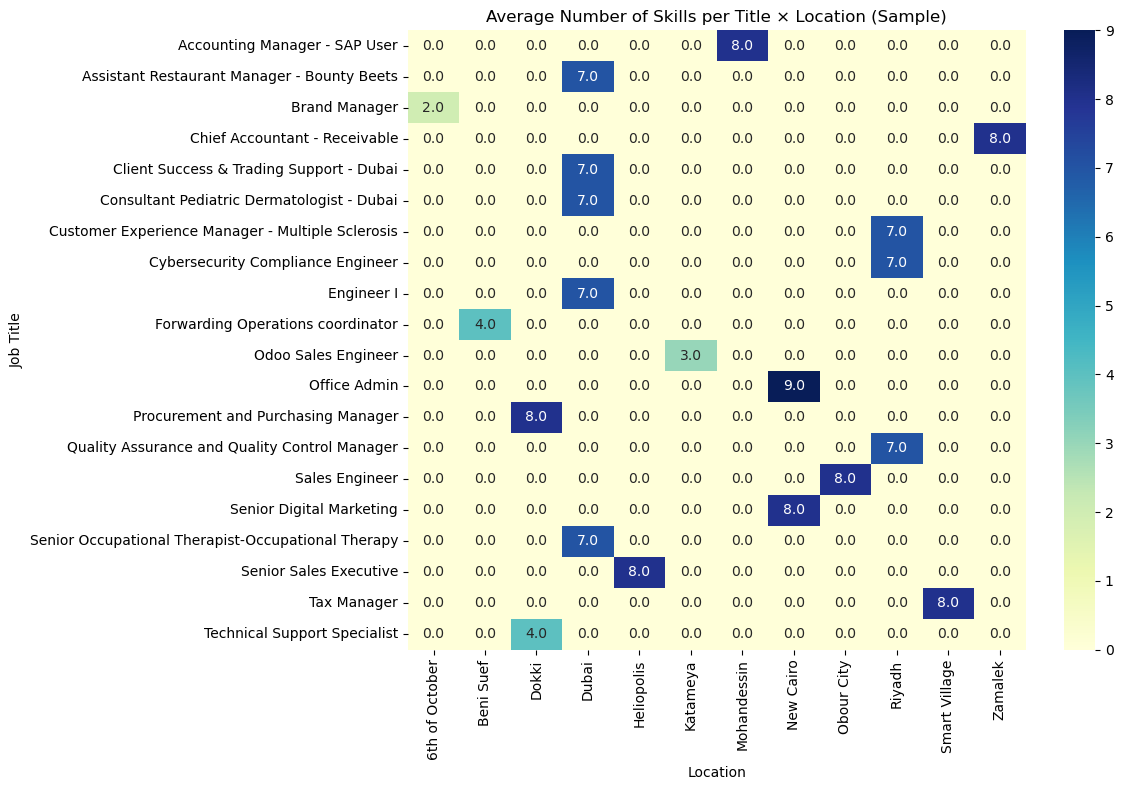

In [41]:
pivot_heatmap = sample_df.pivot_table(index='Title', columns='location', values='Number_of_skills', aggfunc='median', fill_value=0)
plt.figure(figsize=(12,8))
sns.heatmap(pivot_heatmap, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Average Number of Skills per Title × Location (Sample)')
plt.ylabel('Job Title')
plt.xlabel('Location')
plt.tight_layout()
plt.show()

###  Top 15 Companies by Number of Job Titles

The following code creates a **horizontal bar chart** showing the 15 companies with the most job listings:
This visualization highlights the companies with the highest number of job openings in the dataset.

C:\Users\TRUE TECH\AppData\Local\Temp\ipykernel_23188\1279416962.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


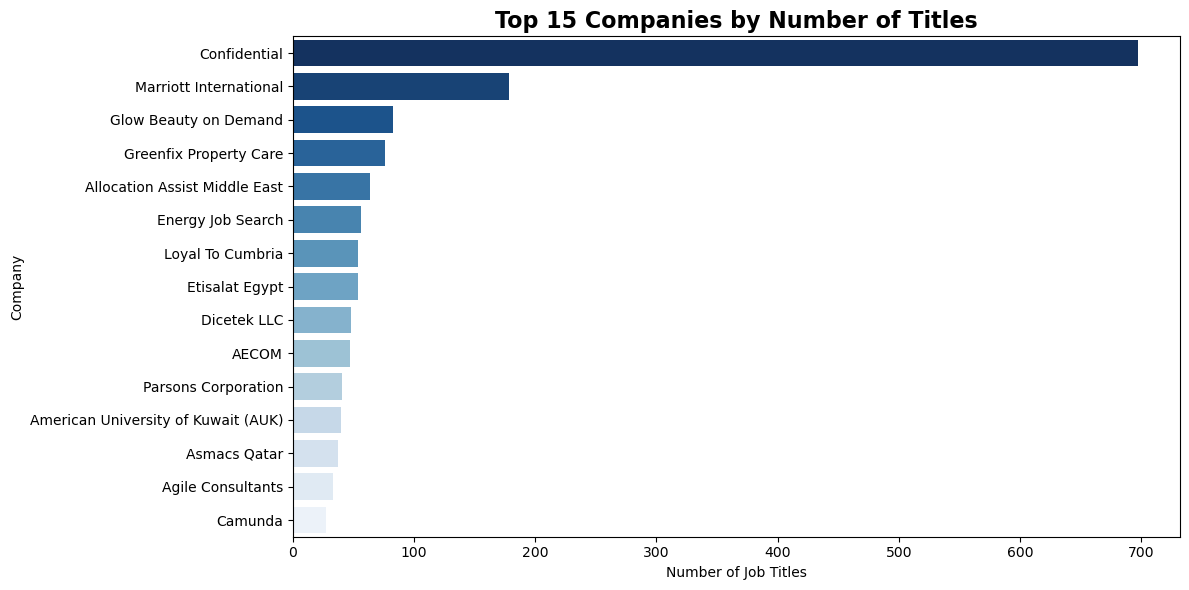

In [42]:
company_title_counts = df.groupby('company')['Title'].count().sort_values(ascending=False)
top_companies = company_title_counts.head(15)
cmap = plt.cm.Blues_r
colors = [cmap(i/(len(top_companies))) for i in range(len(top_companies))]

plt.figure(figsize=(12,6))
sns.barplot(
    x=top_companies.values,
    y=top_companies.index,
    palette=colors
)

plt.title("Top 15 Companies by Number of Titles", fontsize=16, weight='bold')
plt.xlabel("Number of Job Titles")
plt.ylabel("Company")
plt.tight_layout()
plt.show()


### Pie Chart of Top 10 Departments

The following code creates a **pie chart** showing the distribution of the top 10 departments,  
while grouping all other departments under "Other":
This visualization highlights the departments with the most job listings and their relative proportions.

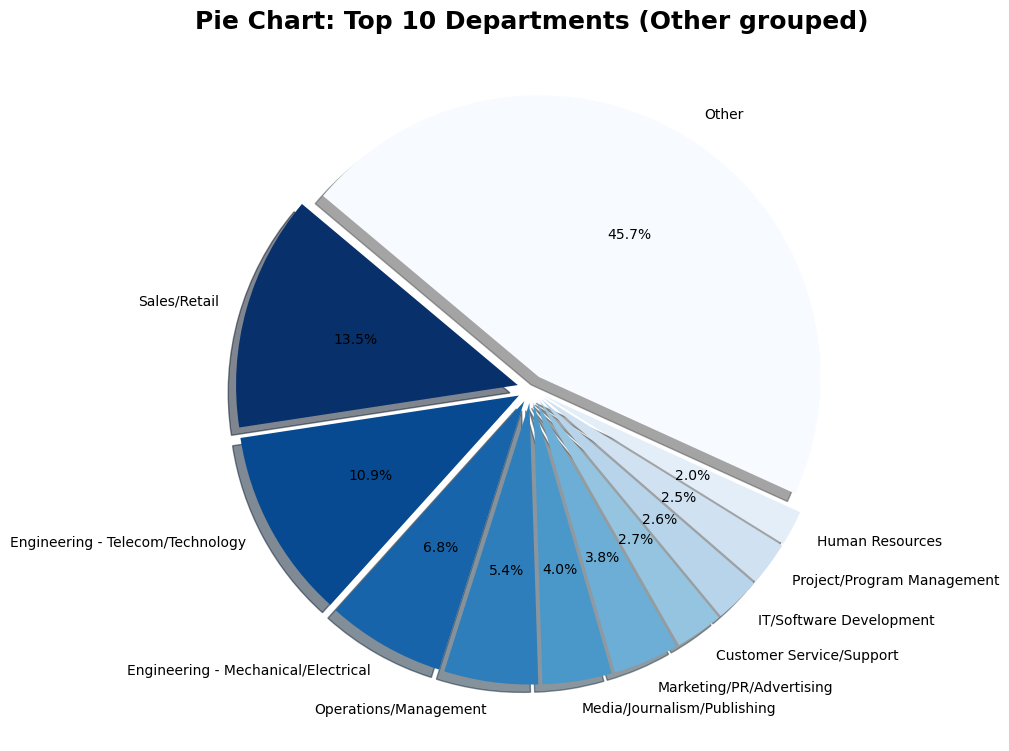

In [43]:
top_departments = df['department'].value_counts().head(10)
other_count = df['department'].value_counts()[10:].sum()
other_series = pd.Series({'Other': other_count})

pie_counts = pd.concat([top_departments, other_series])

cmap = plt.cm.Blues_r  
colors = [cmap(i/(len(pie_counts)-1)) for i in range(len(pie_counts))]
plt.figure(figsize=(10,10))
plt.pie(
    pie_counts,
    labels=pie_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=[0.05]*len(pie_counts),
    shadow=True
)

plt.title("Pie Chart: Top 10 Departments (Other grouped)", fontsize=18, weight='bold')
plt.tight_layout()
plt.show()



### 📌 Dashboard: Multiple Visualizations

The following code creates a **dashboard** with four key visualizations using `matplotlib` and `seaborn`:
This dashboard provides a comprehensive view of the dataset:

Histogram: Experience years distribution per category

Bar Chart: Top companies by number of job titles

Heatmap: Median number of skills per title and location

Pie Chart: Distribution of top departments

C:\Users\TRUE TECH\AppData\Local\Temp\ipykernel_23188\2722805021.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0.5, 1.0, 'Top 10 Departments (Other grouped)')

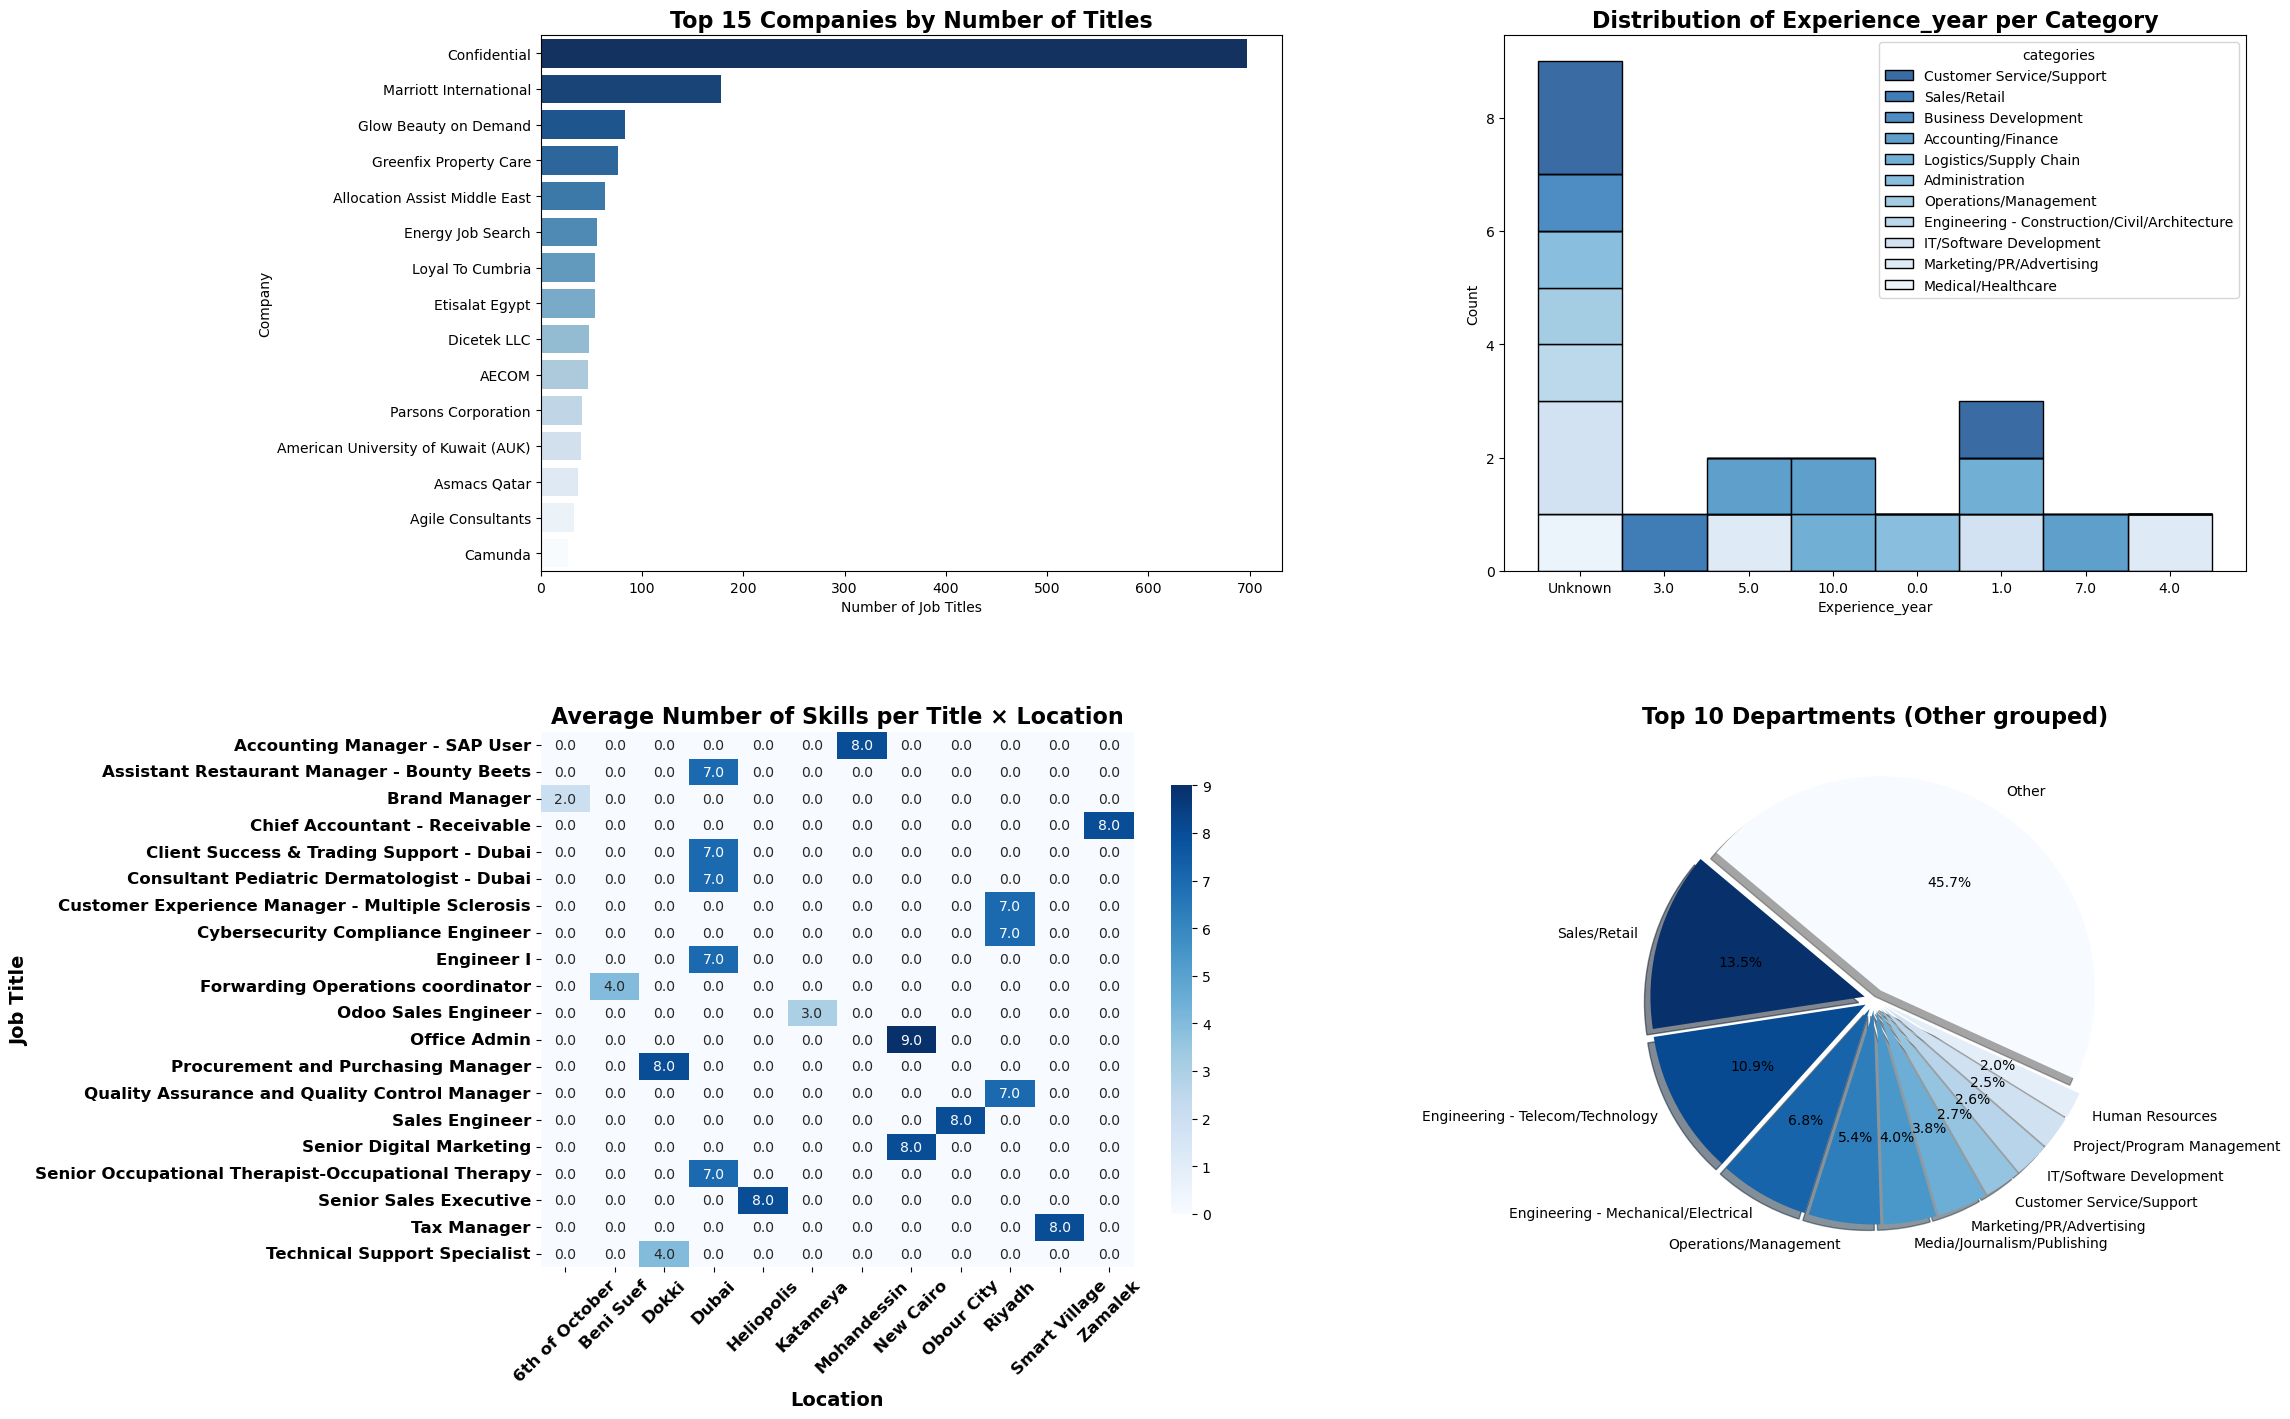

In [44]:


# Dashboard figure
fig = plt.figure(figsize=(22,16))
gs = gridspec.GridSpec(2, 2, figure=fig, hspace=0.3, wspace=0.3)

# -----------------------------
#  Histogram: Experience_year per Category
ax2 = fig.add_subplot(gs[0,1])
num_categories = sample_df['categories'].nunique()
blue_palette = sns.color_palette("Blues_r", num_categories)

sns.histplot(
    data=sample_df,
    x='Experience_year',
    hue='categories',
    multiple='stack',
    palette=blue_palette,
    alpha=0.8,
    ax=ax2
)
ax2.set_title('Distribution of Experience_year per Category', fontsize=16, weight='bold')
ax2.set_xlabel('Experience_year')
ax2.set_ylabel('Count')

# -----------------------------
#  Bar Chart: Top 15 Companies
ax3 = fig.add_subplot(gs[0,0])
company_title_counts = df.groupby('company')['Title'].count().sort_values(ascending=False)
top_companies = company_title_counts.head(15)
colors_bar = [plt.cm.Blues_r(i/(len(top_companies)-1)) for i in range(len(top_companies))]

sns.barplot(
    x=top_companies.values,
    y=top_companies.index,
    palette=colors_bar,
    ax=ax3
)
ax3.set_title("Top 15 Companies by Number of Titles", fontsize=16, weight='bold')
ax3.set_xlabel("Number of Job Titles")
ax3.set_ylabel("Company")

# -----------------------------
#  Heatmap: Average Number of Skills per Title × Location
ax4 = fig.add_subplot(gs[1,0])
pivot_heatmap = sample_df.pivot_table(
    index='Title',
    columns='location',
    values='Number_of_skills',
    aggfunc='median',
    fill_value=0
)
sns.heatmap(
    pivot_heatmap,
    annot=True,
    fmt=".1f",
    cmap='Blues',
    ax=ax4,
    cbar_kws={'shrink': 0.8}, 
)
ax4.set_yticklabels(ax4.get_yticklabels(), rotation=0, fontsize=12, weight='bold') 
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, fontsize=12, weight='bold')

ax4.set_title('Average Number of Skills per Title × Location', fontsize=16, weight='bold')
ax4.set_ylabel('Job Title', fontsize=14, weight='bold')
ax4.set_xlabel('Location', fontsize=14, weight='bold')
# -----------------------------
#  Pie Chart: Experience Levels
ax1 = fig.add_subplot(gs[1,1])

top_departments = df['department'].value_counts().head(10)
other_count = df['department'].value_counts()[10:].sum()
other_series = pd.Series({'Other': other_count})

pie_counts = pd.concat([top_departments, other_series])

cmap = plt.cm.Blues_r  
colors = [cmap(i/(len(pie_counts)-1)) for i in range(len(pie_counts))]

ax1.pie(
    pie_counts,
    labels=pie_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=[0.05]*len(pie_counts),
    shadow=True
)
ax1.set_title("Top 10 Departments (Other grouped)", fontsize=16, weight='bold')

### 📌 Pie Chart: Distribution of Experience Levels

The following code visualizes the distribution of different **experience levels** in the dataset using a pie chart:
This visualization highlights the proportion of each experience level among the job listings.

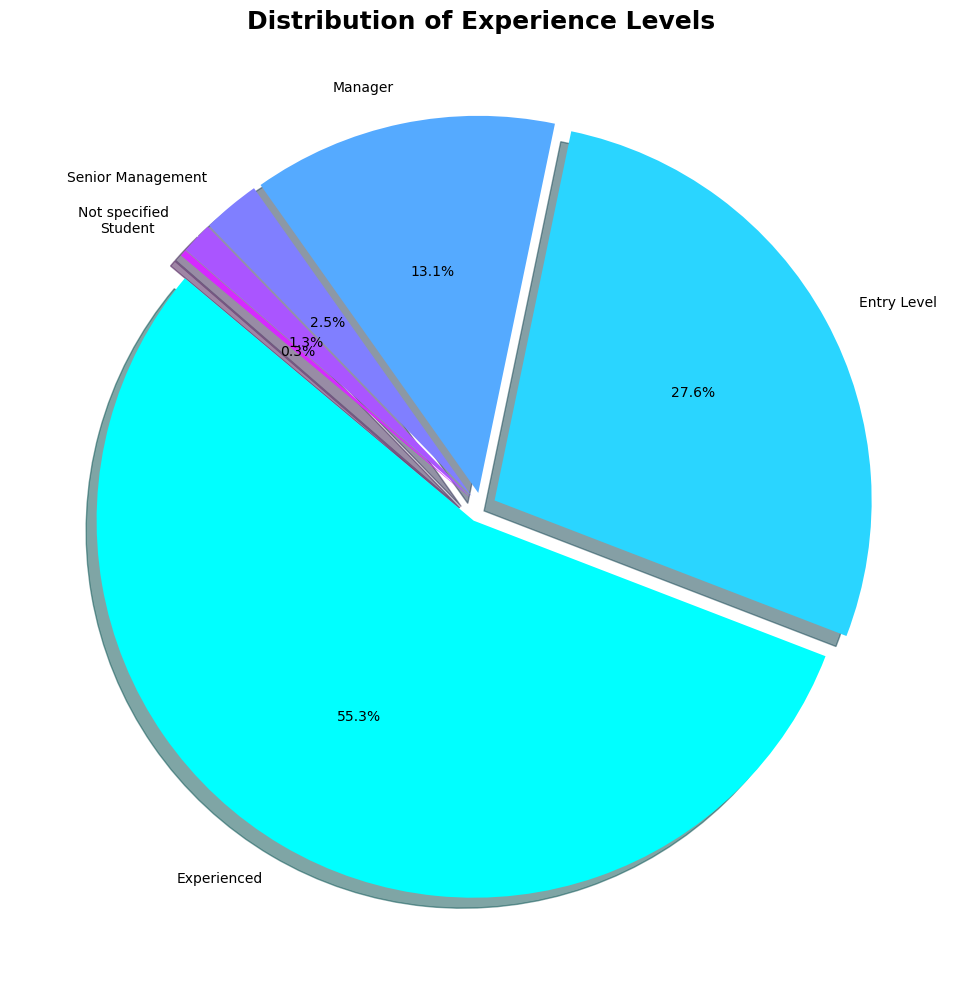

In [45]:
exp_counts = df['Experience_level'].value_counts()

cmap = plt.cm.cool
colors = [cmap(i/(len(exp_counts))) for i in range(len(exp_counts))]

plt.figure(figsize=(10,10))
plt.pie(
    exp_counts.values,
    labels=exp_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    explode=[0.04]*len(exp_counts),
    shadow=True,
    colors=colors
)

plt.title("Distribution of Experience Levels", fontsize=18, weight='bold')
plt.tight_layout()
plt.show()

### 📌 Bubble Chart: Categories vs Number of Skills

The following code creates a **bubble chart** to visualize the relationship between job categories and the number of skills required:
This chart helps identify skill requirements across different categories and their relative frequencies.

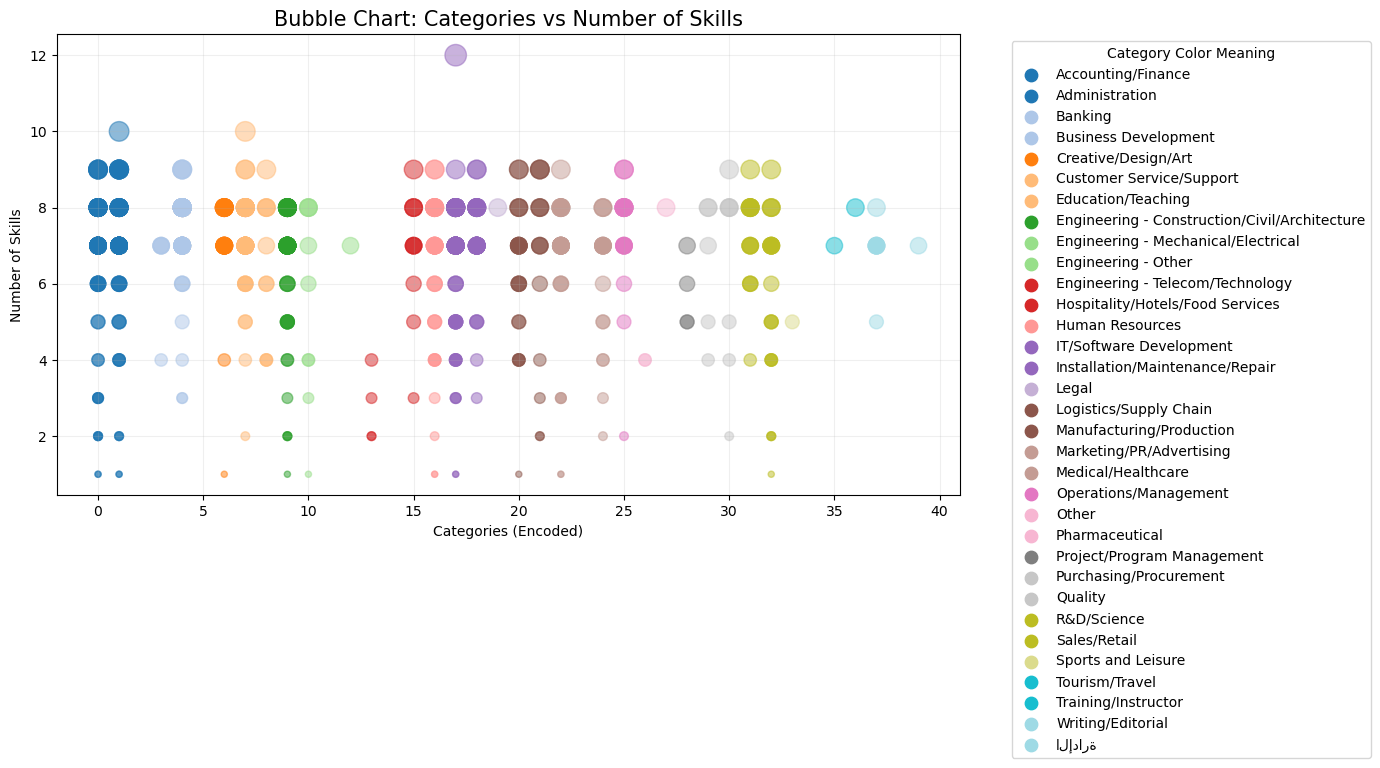

In [46]:
df['categories_encoded'] = df['categories'].astype('category').cat.codes


plot_df = df.sample(800, random_state=42)

plt.figure(figsize=(14,7))


scatter = plt.scatter(
    plot_df['categories_encoded'],
    plot_df['Number_of_skills'],
    c=plot_df['categories'].astype('category').cat.codes,
    s=plot_df['Number_of_skills'] * 20,     
    alpha=0.5,
    cmap='tab20'
)

plt.title("Bubble Chart: Categories vs Number of Skills", fontsize=15)
plt.xlabel("Categories (Encoded)")
plt.ylabel("Number of Skills")
plt.grid(alpha=0.2)


categories = plot_df['categories'].astype('category').cat.categories
colors = scatter.cmap(scatter.norm(range(len(categories))))


for i, cat in enumerate(categories):
    plt.scatter([], [], color=colors[i], label=cat, s=80)

plt.legend(
    title="Category Color Meaning",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()

### 📌 Stacked Histogram: Experience Years per Category (Sample)

The following code creates a **stacked histogram** to show the distribution of `Experience_year` for each job category using a sample of the dataset:
This visualization helps compare how experience requirements vary across different categories.

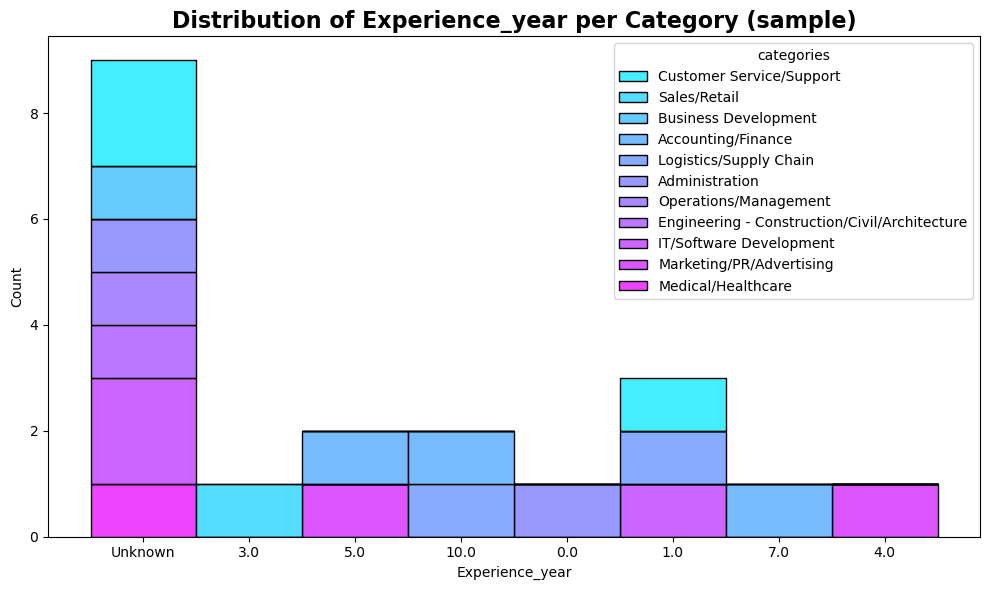

In [47]:
plt.figure(figsize=(10,6))


num_categories = sample_df['categories'].nunique()


purple_blue_palette = sns.color_palette("cool", num_categories)

sns.histplot(
    data=sample_df,
    x='Experience_year',
    hue='categories',
    multiple='stack',
    palette=purple_blue_palette,
    alpha=0.8    
)

plt.title('Distribution of Experience_year per Category (sample)', fontsize=16, weight='bold')
plt.xlabel('Experience_year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### 📌 Line Plot: Number of Employees per Category by Experience Year

The following code creates a **line plot** showing how the number of employees/jobs in each category changes with experience years:
This plot helps track trends in category distributions as experience increases.

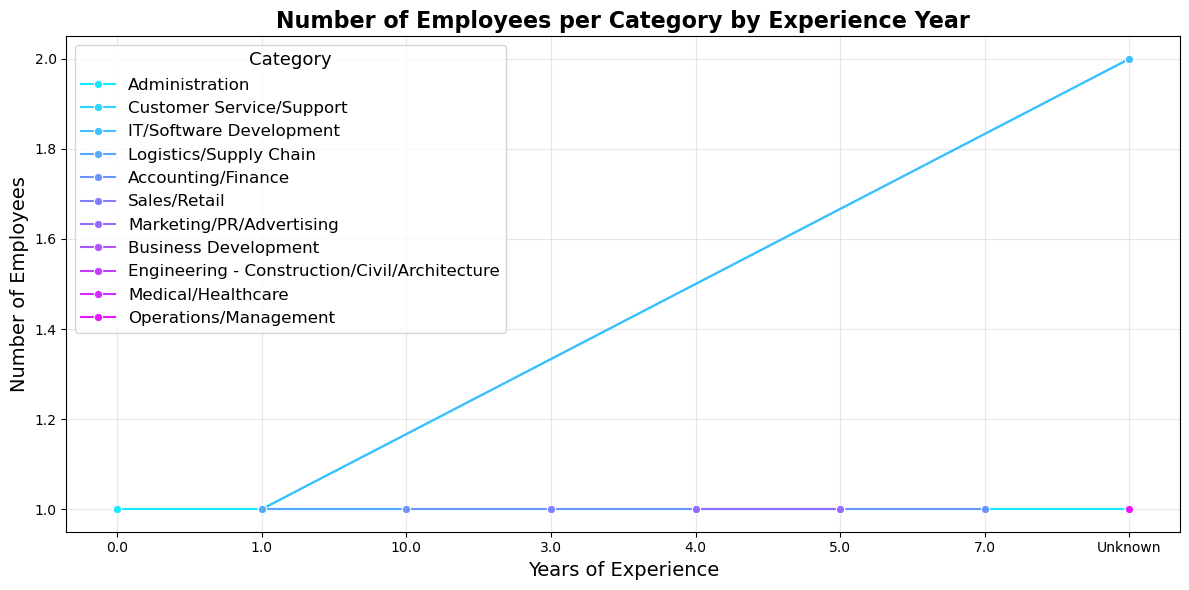

In [48]:
df_grouped = sample_df.groupby(['Experience_year', 'categories']).size().reset_index(name='count')

plt.figure(figsize=(12,6))


sns.lineplot(
    data=df_grouped,
    x='Experience_year',
    y='count',
    hue='categories',
    marker='o',
    palette='cool' 
)

plt.title("Number of Employees per Category by Experience Year", fontsize=16, weight='bold')
plt.xlabel("Years of Experience", fontsize=14)
plt.ylabel("Number of Employees", fontsize=14)
plt.grid(alpha=0.3)
plt.xticks(df_grouped['Experience_year'].unique())  
plt.legend(title="Category", fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.show()

Summary

This project explored a cleaned dataset of job postings scraped from Wuzzuf.
Several analytical steps and visualizations were performed to better understand:

The distribution of required skills across different job types, categories, and companies.

The relationship between experience level, experience years, and job characteristics.

Company hiring trends based on the number of posted titles.

Skill intensity across job titles and locations.

Category-based patterns through heatmaps, histograms, line charts, and bubble charts.

The analysis highlights clear variations in job requirements, company behavior, and category-specific demands in the job market.